## Import necessary libraries

In [75]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## Extract features (mfcc, chroma, mel) from a sound file

In [90]:

def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        print(sample_rate)
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            print(mfccs)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

# extract_feature("./RAVDESS/Actor_01/03-01-03-01-01-01-01.wav", mfcc=True, chroma=True, mel=True)
extract_feature("./SUBESCO/F_01_OISHI_S_10_ANGRY_1.wav", mfcc=True, chroma=True, mel=False)

44100


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=2
  return f(*args, **kwargs)


[[-1.0503542e+03 -1.0503542e+03 -1.0503542e+03 ... -1.0503542e+03
  -1.0240986e+03 -1.0032705e+03]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   1.1113029e+01  8.0723476e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  -6.5560241e+00 -5.5622382e+00]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  -3.4331117e-02 -4.6779279e-02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  -7.2962567e-02 -4.8579611e-02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  -7.0928596e-03 -3.6408670e-02]]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [106]:
def extract_feature(file_name, mfccs, chroma, mel):
    y ,sr = librosa.load(file_name, duration=5, offset=0.5)
    result=np.array([])
    if(mfccs):
        mfccs =np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
        result=np.hstack((result, mfccs))
    if(chroma):
        stft=np.abs(librosa.stft(y))
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(y, sr=sr).T,axis=0)
        result=np.hstack((result, mel))
    return result


extract_feature("./SUBESCO/F_01_OISHI_S_10_ANGRY_1.wav", mfccs=True, chroma=True, mel=True)

<ipython-input-106-cefba59f2626>:12: FutureWarning: Pass y=[-5.8816284e-02 -7.7525623e-02 -5.8026742e-02 ... -3.0722967e-06
  1.4238205e-06  2.4898200e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(y, sr=sr).T,axis=0)


array([-1.97970032e+02,  5.39019775e+01, -7.47349930e+00,  1.54062595e+01,
       -1.64477658e+00,  6.70004368e-01, -5.09518337e+00, -2.41899991e+00,
       -6.94994211e+00,  1.66377449e+00, -4.45638943e+00, -1.83087826e+00,
       -2.63091826e+00,  7.52181411e-01, -3.87786865e+00, -1.84587598e+00,
       -3.07073021e+00, -7.91006207e-01, -3.81855321e+00,  7.40493655e-01,
       -6.76647246e-01,  2.83525729e+00,  2.72117305e+00,  8.32362747e+00,
        3.06120205e+00,  5.90772438e+00,  1.62555230e+00,  2.93098593e+00,
        6.70543194e-01,  2.71701884e+00,  8.51229578e-03,  3.99384356e+00,
        5.54161489e-01,  3.15907979e+00, -1.70438421e+00, -5.74910343e-01,
       -1.78887022e+00,  8.05806398e-01, -1.05784154e+00,  8.99862409e-01,
        6.66912377e-01,  6.73344135e-01,  6.73634529e-01,  6.35489941e-01,
        5.07308662e-01,  4.57295358e-01,  4.84126896e-01,  5.20513892e-01,
        5.51498234e-01,  5.98870099e-01,  6.19725525e-01,  6.42768919e-01,
        9.18710995e+00,  

## Emotions in the RAVDESS dataset

In [78]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#DataFlair - Emotions to observe
observed_emotions=['angry', 'happy', 'fearful', 'disgust']

## Load the data and extract features for each sound file

In [79]:
#DataFlair - Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob(".\\RAVDESS\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        print(file)
        input()
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

## Split the dataset

In [80]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

.\RAVDESS\Actor_01\03-01-03-01-01-01-01.wav



<ipython-input-77-9f41438a0868>:15: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


.\RAVDESS\Actor_01\03-01-03-01-01-02-01.wav


KeyboardInterrupt: Interrupted by user

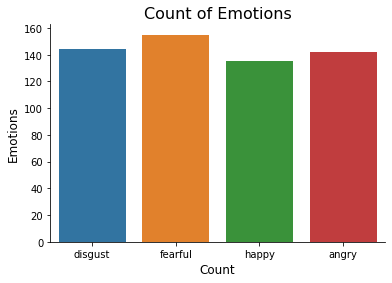

In [70]:
import matplotlib.pyplot as mplt
import seaborn as sbn

mplt.title("Count of Emotions", size=16)
sbn.countplot(x=y_train)
mplt.xlabel('Count',size = 12)
mplt.ylabel('Emotions',size = 12)
sbn.despine(top=True,right=True,left=False,bottom=False)

In [71]:
x_train[0]

array([-5.22061890e+02,  3.50668907e+01,  3.75342965e+00,  8.25096607e+00,
       -6.82484865e+00, -2.17128977e-01, -1.53533993e+01, -8.40860748e+00,
       -1.37559566e+01,  9.54228461e-01, -8.50486183e+00, -2.91087556e+00,
       -6.54408336e-01, -2.16127944e+00,  2.59967774e-01, -3.94957006e-01,
        3.93508315e+00,  3.49161673e+00,  1.61637747e+00, -7.00251102e-01,
       -2.44239044e+00, -5.55101573e-01,  7.47600138e-01, -5.85062504e-01,
       -8.76788199e-02,  5.93730497e+00,  5.41902018e+00,  5.92085218e+00,
        1.71201110e+00,  2.79930902e+00,  4.34409046e+00,  6.64095545e+00,
        8.33745670e+00,  4.66863632e+00, -8.62458050e-02,  7.11737633e-01,
        3.79981446e+00,  5.90181828e+00,  1.02495813e+00, -1.52339302e-02,
        5.53609192e-01,  5.79114377e-01,  6.16039157e-01,  6.00282371e-01,
        6.41938984e-01,  7.51618445e-01,  7.65470386e-01,  7.59810865e-01,
        7.16218531e-01,  6.45714760e-01,  6.92020059e-01,  6.72237098e-01,
        1.72313396e-03,  

In [53]:
def createwaveplt(data,sr,e):
    mplt.figure(figsize=(10,3))
    mplt.title('Waveplot for audio with () emotion'.format(e), size=15)
    librosa.display_waveplot(data,sr=sr)
    mplt.show()

## DATASET Dimensions

In [6]:
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


## Get the number of features extracted

In [16]:

print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


## Initialize the Multi Layer Perceptron Classifier

In [17]:

model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

## Train the model

In [9]:

model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

## Predict for the test set

In [ ]:

y_pred=model.predict(x_test)

## Calculate the accuracy of our model

In [11]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 65.62%


In [32]:
x_train[0]

array([-4.95644043e+02,  3.97769356e+01, -4.12729502e+00, -1.97449112e+00,
       -4.54384279e+00, -6.83164120e+00, -2.12619820e+01, -1.05822439e+01,
       -8.26089478e+00, -5.67265701e+00, -8.64184284e+00, -6.25973034e+00,
       -9.26407146e+00, -1.98956347e+00, -5.35249949e+00, -6.02671957e+00,
       -3.41138005e+00, -4.10156488e+00, -6.02799940e+00, -4.22197390e+00,
       -3.69840264e+00, -5.06794071e+00, -3.61624265e+00, -2.78097582e+00,
       -3.19974613e+00,  4.09083188e-01,  6.72381341e-01,  2.20401669e+00,
        7.05427289e-01,  4.31941360e-01, -8.01847219e-01,  1.65409005e+00,
        2.53967810e+00,  5.30073822e-01, -6.04833782e-01, -9.53970134e-01,
       -6.36675119e-01,  2.11421132e+00,  1.76953936e+00,  5.73146641e-01,
        5.91688514e-01,  6.26818359e-01,  6.38921976e-01,  6.76621854e-01,
        7.11426795e-01,  7.09640980e-01,  7.48476863e-01,  7.71825254e-01,
        7.61754572e-01,  7.47252226e-01,  7.33365476e-01,  5.93863189e-01,
        6.44127658e-06,  